# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Yenchang Hsieh
    
    Zhenyu Hu
    
    Ruochen Shi
    
    Mengdi Li
    
    Rui Li

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [27]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# the training data folder must be passed as first argument
movie_reviews_data_folder = 'review_polarity/txt_sentoken/'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=10, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (2, 2), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)    
grid_search.fit(docs_train, y_train)
print(grid_search.cv_results_.keys())

n_samples: 2000
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_vect__ngram_range', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])


In [3]:
# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.81; std - 0.02
1 params - {'vect__ngram_range': (2, 2)}; mean - 0.79; std - 0.01
2 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.02


In [4]:
# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)
print(np.mean(y_predicted == y_test))

0.874


In [5]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.88      0.86      0.87       246
        pos       0.87      0.89      0.88       254

avg / total       0.87      0.87      0.87       500



In [6]:
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[212  34]
 [ 29 225]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

**1. Define the term frequency–inverse document frequency (TF-IDF) statistic**
<br>
<b>TF-IDF(term frequency–inverse document frequency)</b><br>
<b>TF</b>: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term 
frequency is often divided by the document length (aka. the total number of terms in the document) as a way of 
normalization:  TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

<b>IDF</b>: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are 
considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a 
lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones,
by computing the following: IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [9]:
# 2. Run the TfidVectorizer class on the training data above (docs_train).
# split the dataset in training and test set:

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent

# get global idf value for every feature
vectorizer = TfidfVectorizer(min_df=10, max_df=0.95)
X = vectorizer.fit_transform(docs_train)
idf = vectorizer.idf_
print(dict(zip(vectorizer.get_feature_names(), idf)))

{'000': 4.0372207126174064, '10': 3.3794128985027703, '100': 4.2708355637989115, '101': 5.7489374741719255, '11': 5.1358330012855165, '12': 4.6763006719070761, '13': 4.288535140898313, '13th': 5.6058366305312521, '14': 5.3181545580794714, '15': 4.3820611989091365, '16': 5.3181545580794714, '17': 4.5762172133500938, '18': 5.1358330012855165, '19': 5.4235150737372972, '1950': 5.8289801818454618, '1950s': 5.9159915588350911, '1960': 5.5412981093936811, '1960s': 5.1783926157043121, '1968': 5.9159915588350911, '1970': 5.6748295020182029, '1970s': 5.1783926157043121, '1973': 5.6058366305312521, '1974': 5.9159915588350911, '1977': 5.7489374741719255, '1978': 5.9159915588350911, '1979': 5.6748295020182029, '1980': 5.5412981093936811, '1980s': 5.5412981093936811, '1981': 5.6058366305312521, '1984': 5.4806734875772456, '1985': 5.3694478524670215, '1986': 5.6748295020182029, '1987': 5.6748295020182029, '1988': 5.6058366305312521, '1989': 5.3181545580794714, '1990': 5.3694478524670215, '1991': 5.2

In [12]:
# 3. Explore the min_df and max_df parameters of TfidVectorizer. What do they mean? 
#    How do they change the features you get?
# min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given 
#         threshold. This value is also called cut-off in the literature. If float, the parameter represents a 
#         proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
# max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given 
#         threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, 
#         integer absolute counts. This parameter is ignored if vocabulary is not None.

# If min_df is set to be higher, it means there are more features to be filtered out
# Similarily, if max_df is set to be lower, it will cause the same result.
import pandas as pd

max_df = np.linspace(0.5,1,num=11)
min_df = np.linspace(5,50,num=10)
df_num_of_feature_name = pd.DataFrame(index=max_df, columns=min_df)
df_num_of_feature_name = df_num_of_feature_name.fillna(0.0)

In [13]:
for i in range(len(max_df)):
    for j in range(len(min_df)):
        vectorizer = TfidfVectorizer(min_df=int(min_df[j]), max_df=max_df[i])
        vectorizer.fit_transform(docs_train)
        df_num_of_feature_name[min_df[j]][max_df[i]] = len(vectorizer.get_feature_names())
print(df_num_of_feature_name)

         5.0     10.0    15.0    20.0    25.0    30.0    35.0    40.0    45.0  \
0.50  11219.0  6637.0  4777.0  3692.0  3081.0  2616.0  2233.0  1975.0  1789.0   
0.55  11235.0  6653.0  4793.0  3708.0  3097.0  2632.0  2249.0  1991.0  1805.0   
0.60  11243.0  6661.0  4801.0  3716.0  3105.0  2640.0  2257.0  1999.0  1813.0   
0.65  11247.0  6665.0  4805.0  3720.0  3109.0  2644.0  2261.0  2003.0  1817.0   
0.70  11255.0  6673.0  4813.0  3728.0  3117.0  2652.0  2269.0  2011.0  1825.0   
0.75  11265.0  6683.0  4823.0  3738.0  3127.0  2662.0  2279.0  2021.0  1835.0   
0.80  11269.0  6687.0  4827.0  3742.0  3131.0  2666.0  2283.0  2025.0  1839.0   
0.85  11274.0  6692.0  4832.0  3747.0  3136.0  2671.0  2288.0  2030.0  1844.0   
0.90  11283.0  6701.0  4841.0  3756.0  3145.0  2680.0  2297.0  2039.0  1853.0   
0.95  11286.0  6704.0  4844.0  3759.0  3148.0  2683.0  2300.0  2042.0  1856.0   
1.00  11297.0  6715.0  4855.0  3770.0  3159.0  2694.0  2311.0  2053.0  1867.0   

        50.0  
0.50  1627.0

In [56]:
# test of multiple max_df values when min_df = 10
num_of_features = {}
for i in [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]:
    vectorizer = TfidfVectorizer(min_df=10, max_df=i)
    vectorizer.fit_transform(docs_train)
    num_of_features[i] = len(vectorizer.get_feature_names())
print(num_of_features)

{0.5: 6629, 0.55: 6644, 0.6: 6652, 0.65: 6657, 0.7: 6666, 0.75: 6676, 0.8: 6678, 0.85: 6684, 0.9: 6693, 0.95: 6694}


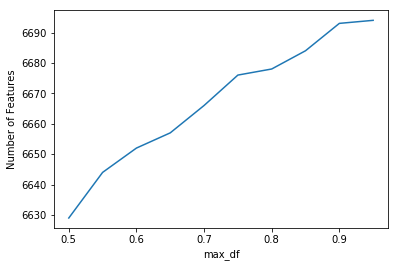

In [57]:
plt.plot(list(num_of_features.keys()),list(num_of_features.values()))
plt.xlabel('max_df')
plt.ylabel('Number of Features')
plt.show()

In [58]:
# min_df
num_of_features = {}
for i in [5,10,15,20,25,30,35,40,45,50]:
    vectorizer = TfidfVectorizer(min_df=i, max_df=0.95)
    vectorizer.fit_transform(docs_train)
    num_of_features[i] = len(vectorizer.get_feature_names())
print(num_of_features)

{5: 11142, 10: 6694, 15: 4840, 20: 3792, 25: 3148, 30: 2687, 35: 2278, 40: 2022, 45: 1844, 50: 1667}


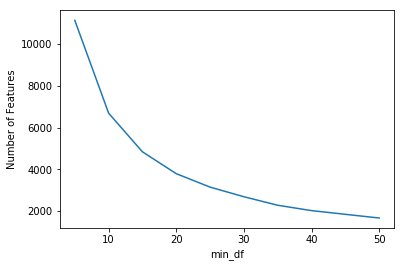

In [59]:
plt.plot(list(num_of_features.keys()),list(num_of_features.values()))
plt.xlabel('min_df')
plt.ylabel('Number of Features')
plt.show()

In [20]:
df_predict = pd.DataFrame(index=max_df, columns=min_df)
df_predict = df_predict.fillna(0.0)

In [21]:
for i in range(len(max_df)):
    for j in range(len(min_df)):
        pipeline = Pipeline([
            ('vect', TfidfVectorizer(min_df=int(min_df[j]), max_df=max_df[i])),
            ('clf', LinearSVC(C=1000)),
        ])
        pipeline.fit(docs_train, y_train)
        pipeline_predict = pipeline.predict(docs_test)
        pred = np.mean(pipeline_predict == y_test)
        df_predict[min_df[j]][max_df[i]] = pred
print(df_predict)

       5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0   50.0
0.50  0.858  0.846  0.848  0.830  0.824  0.818  0.810  0.832  0.828  0.814
0.55  0.864  0.842  0.848  0.832  0.826  0.824  0.824  0.828  0.816  0.824
0.60  0.868  0.856  0.832  0.828  0.828  0.824  0.814  0.834  0.818  0.812
0.65  0.868  0.850  0.832  0.832  0.828  0.830  0.816  0.824  0.816  0.812
0.70  0.864  0.850  0.824  0.836  0.828  0.828  0.818  0.830  0.812  0.818
0.75  0.862  0.850  0.824  0.830  0.820  0.830  0.818  0.834  0.806  0.818
0.80  0.864  0.844  0.828  0.834  0.820  0.836  0.818  0.834  0.808  0.812
0.85  0.874  0.852  0.840  0.838  0.822  0.818  0.812  0.832  0.804  0.820
0.90  0.870  0.852  0.844  0.840  0.832  0.824  0.814  0.828  0.814  0.818
0.95  0.866  0.850  0.848  0.844  0.820  0.828  0.818  0.820  0.814  0.822
1.00  0.862  0.850  0.844  0.832  0.818  0.826  0.814  0.826  0.804  0.808


In [22]:
# 4. Explore the ngram_range parameter of TfidVectorizer. What does it mean? How does it change the features you get? 
# (Note, large values of ngram_range may take a long time to run!)

# ngram_range: The lower and upper boundary of the range of n-values for different n-grams to be extracted. 
# All values of n such that min_n <= n <= max_n will be used.

# If ngram_range has larger region, it will have much more combinations from features

import numpy as np
import pandas as pd

num_of_features = {}
for i in range(1,6):
    ngram_vectorizer = TfidfVectorizer(ngram_range=(1, i))
    ngram_vectorizer.fit_transform(docs_train)
    count = len(ngram_vectorizer.get_feature_names())
    num_of_features[i] = count
print(num_of_features)

{1: 35490, 2: 436282, 3: 1199461, 4: 2094959, 5: 3020381}


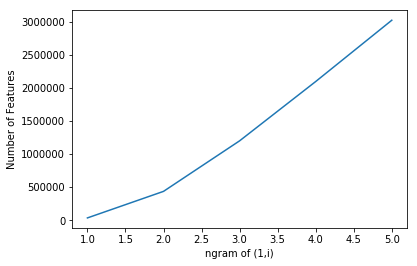

In [28]:
plt.plot(list(num_of_features.keys()),list(num_of_features.values()))
plt.xlabel('ngram of (1,i)')
plt.ylabel('Number of Features')
plt.show()

In [29]:
num_of_features = {}
for i in range(1,6):
    ngram_vectorizer = TfidfVectorizer(ngram_range=(i, 5))
    ngram_vectorizer.fit_transform(docs_train)
    count = len(ngram_vectorizer.get_feature_names())
    num_of_features[i] = count

print(num_of_features)

3004087
2968620
2569744
1810430
920010
{1: 3004087, 2: 2968620, 3: 2569744, 4: 1810430, 5: 920010}


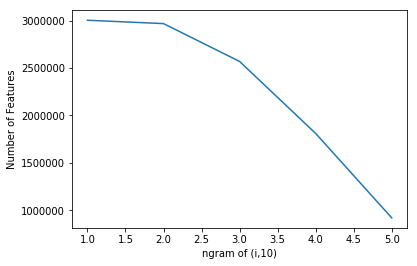

In [30]:
plt.plot(list(num_of_features.keys()),list(num_of_features.values()))
plt.xlabel('ngram of (i,10)')
plt.ylabel('Number of Features')
plt.show()

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [31]:
vectorizer = TfidfVectorizer(min_df=10, max_df=0.95)
fit_X = vectorizer.fit(docs_train)

# Xtrain
Xtrain = vectorizer.transform(docs_train)
print(Xtrain)

# Xtest
Xtest = vectorizer.transform(docs_test)
print(Xtest)

  (0, 6680)	0.0164013737065
  (0, 6648)	0.0196875645517
  (0, 6569)	0.020231943181
  (0, 6563)	0.0523495273954
  (0, 6554)	0.0394467888515
  (0, 6549)	0.0358479238555
  (0, 6546)	0.0442621603281
  (0, 6544)	0.0330313342298
  (0, 6540)	0.067839069198
  (0, 6533)	0.0438859993538
  (0, 6505)	0.0600066949959
  (0, 6502)	0.0419934671804
  (0, 6484)	0.0163786398605
  (0, 6390)	0.0391626036226
  (0, 6379)	0.0435177372573
  (0, 6355)	0.0485524003755
  (0, 6315)	0.0331233572358
  (0, 6247)	0.0627437488838
  (0, 6215)	0.0614924668582
  (0, 6198)	0.0418129973558
  (0, 6197)	0.0358497238889
  (0, 6118)	0.0602346404032
  (0, 6111)	0.234137382055
  (0, 6062)	0.057520550089
  (0, 6056)	0.0365252442329
  :	:
  (1499, 562)	0.0649261365461
  (1499, 547)	0.0544427877243
  (1499, 539)	0.0452743609997
  (1499, 526)	0.0515674810952
  (1499, 516)	0.0224988421373
  (1499, 490)	0.0473603151746
  (1499, 472)	0.0494032092332
  (1499, 445)	0.0262777036212
  (1499, 397)	0.0620508299169
  (1499, 394)	0.023949559159

In [32]:
# Try a number of different parameter settings for each and judge your performance using a confusion matrix
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=10, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])
pipeline.fit(docs_train, y_train)
y_predict = pipeline.predict(docs_test)
print(np.mean(y_test == y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

0.83
[[219  46]
 [ 39 196]]


In [33]:
linear_svc_predict = {}
c_range = np.arange(10,1010,10)
for i in c_range:
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=10, max_df=0.95)),
        ('clf', LinearSVC(C=i)),
    ])
    pipeline.fit(docs_train, y_train)
    y_predict = pipeline.predict(docs_test)
    pred = np.mean(y_test == y_predict) 
    linear_svc_predict[i] = pred
    
print(linear_svc_predict)

{10: 0.82799999999999996, 20: 0.83399999999999996, 30: 0.83599999999999997, 40: 0.83199999999999996, 50: 0.82999999999999996, 60: 0.82999999999999996, 70: 0.82999999999999996, 80: 0.82999999999999996, 90: 0.82999999999999996, 100: 0.82999999999999996, 110: 0.82999999999999996, 120: 0.82999999999999996, 130: 0.82999999999999996, 140: 0.82999999999999996, 150: 0.82999999999999996, 160: 0.82999999999999996, 170: 0.82999999999999996, 180: 0.82999999999999996, 190: 0.82999999999999996, 200: 0.82999999999999996, 210: 0.82999999999999996, 220: 0.82999999999999996, 230: 0.82999999999999996, 240: 0.82999999999999996, 250: 0.82999999999999996, 260: 0.82999999999999996, 270: 0.82999999999999996, 280: 0.82999999999999996, 290: 0.82999999999999996, 300: 0.82999999999999996, 310: 0.82999999999999996, 320: 0.82999999999999996, 330: 0.82999999999999996, 340: 0.82999999999999996, 350: 0.82999999999999996, 360: 0.82999999999999996, 370: 0.82999999999999996, 380: 0.82999999999999996, 390: 0.8299999999999

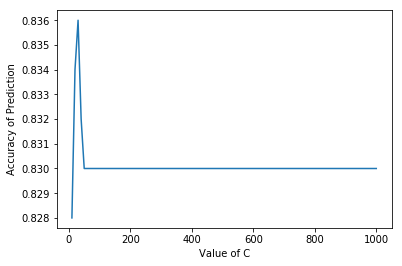

In [34]:
plt.plot(list(linear_svc_predict.keys()), list(linear_svc_predict.values()))
plt.xlabel('Value of C')
plt.ylabel('Accuracy of Prediction')
plt.show()

In [36]:
maximum_C = max(linear_svc_predict, key=linear_svc_predict.get)
print(maximum_C, linear_svc_predict[maximum_C])

30 0.836


In [37]:
# Try a number of different parameter settings for each and judge your performance using a confusion matrix
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=10, max_df=0.95)),
    ('clf', LinearSVC(C=maximum_C)),
])
pipeline.fit(docs_train, y_train)
y_predict = pipeline.predict(docs_test)
print(np.mean(y_test == y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

0.836
[[220  45]
 [ 37 198]]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=10, max_df=0.95)),
    ('clf', KNeighborsClassifier(n_neighbors=5)),
])
pipeline.fit(docs_train, y_train)
y_predict = pipeline.predict(docs_test)
print(np.mean(y_test == y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

0.654
[[154 111]
 [ 62 173]]


In [39]:
k = np.arange(1,51,1)
df_k_mean = pd.DataFrame(index=['kmean_score'], columns=k)
df_k_mean = df_k_mean.fillna(0.0)
print(df_k_mean)

              1    2    3    4    5    6    7    8    9    10 ...    41   42  \
kmean_score  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   

              43   44   45   46   47   48   49   50  
kmean_score  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 50 columns]


In [40]:
k_mean_pred = {}
for i in range(1,51):
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=10, max_df=0.95)),
        ('clf', KNeighborsClassifier(n_neighbors=i)),
    ])
    pipeline.fit(docs_train, y_train)
    y_predict = pipeline.predict(docs_test)
    pred = np.mean(y_test == y_predict)
    k_mean_pred[i] = pred
    df_k_mean[i]['kmean_score'] = pred
print(df_k_mean)

                1      2     3     4      5      6      7     8     9      10  \
kmean_score  0.674  0.674  0.68  0.66  0.654  0.664  0.688  0.68  0.68  0.686   

             ...       41    42     43     44    45     46     47     48  \
kmean_score  ...    0.724  0.72  0.718  0.724  0.72  0.728  0.718  0.718   

               49     50  
kmean_score  0.72  0.716  

[1 rows x 50 columns]


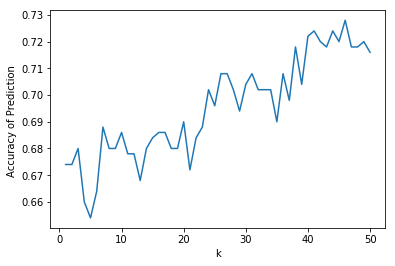

In [41]:
plt.plot(list(k_mean_pred.keys()), list(k_mean_pred.values()))
plt.xlabel('k')
plt.ylabel('Accuracy of Prediction')
plt.show()

In [44]:
maximum_k = max(k_mean_pred, key=k_mean_pred.get)
print(maximum_k, k_mean_pred[maximum_k])

46 0.728


In [45]:
pipeline = Pipeline([
                ('vect', TfidfVectorizer(min_df=10, max_df=0.95)),
                ('clf', KNeighborsClassifier(n_neighbors=maximum_k)),
            ])
pipeline.fit(docs_train, y_train)
y_predict = pipeline.predict(docs_test)
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[195  70]
 [ 66 169]]


**Does one classifier, or one set of parameters work better?
Why do you think it might be working better?**
<br><br>
<b>LinearSVC</b> do better on this dataset. It's probably because this dataset is small <br>
If you have a lot of points in a low dimensional space then KNN is probably a good choice. <br>
If you have a few points in a high dimensional space then a linear SVM is probably better. <br>



**For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
Can you conjecture on why the classifier made a mistake for this prediction?**

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [46]:
#PCA Method

0.622


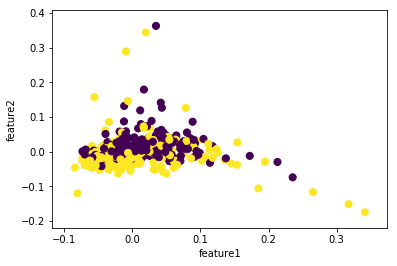

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
count_vec = TfidfVectorizer(binary=False, decode_error='ignore',
                                stop_words='english',min_df=3, max_df=0.95,ngram_range=(1,2))

x_train = count_vec.fit_transform(docs_train)
x_test = count_vec.transform(docs_test)


pca = PCA(n_components=2)
fea_train = pca.fit_transform(x_train.toarray())
fea_test=pca.transform(x_test.toarray())

svclf = LinearSVC(C=21.544346900318846)
svclf.fit(fea_train, y_train)
pred = svclf.predict(fea_test)
print(np.mean(pred == y_test))
df = pd.DataFrame(data=fea_test, columns=['1','2'])
fea1=list(df['1'].values)
fea2=list(df['2'].values)

Cluster = y_test
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(fea1, fea2, c=Cluster, s=50)
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')

In [48]:
#The distance from the "negative" central versus the distance from the "positive" central

(2000, 3827)
1000
1000


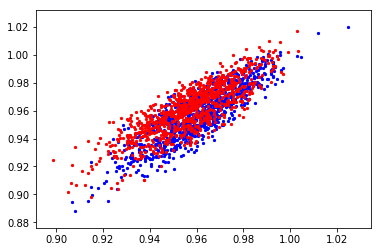

In [49]:
#Using k-Means for dimensional reduction with all features in data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.cluster import KMeans


categories = ['neg', 'pos']
dataset = load_files(movie_reviews_data_folder, shuffle=False)
target_names = dataset.target_names


vectorizer = TfidfVectorizer(decode_error='ignore',max_df=0.5, min_df=50,ngram_range=(1, 2))
vectors = vectorizer.fit_transform(dataset.data)
print(vectors.shape)

y = dataset.target

clf = KMeans(n_clusters=2)
clf.fit(vectors)
centroids = clf.cluster_centers_
centroid_0 = centroids[0]
centroid_1 = centroids[1]

neg = vectors[y==0].toarray()
pos = vectors[y==1].toarray()
print(len(neg))
print(len(pos))

neg_distance_c0 = []
neg_distance_c1 = []
pos_distance_c0 = []
pos_distance_c1 = []

for i in range(1000):
    neg_distance_c0.append(np.linalg.norm(neg[i]-centroid_0))
    neg_distance_c1.append(np.linalg.norm(neg[i]-centroid_1))
    pos_distance_c0.append(np.linalg.norm(pos[i]-centroid_0))
    pos_distance_c1.append(np.linalg.norm(pos[i]-centroid_1))
    
plt.scatter(neg_distance_c0, neg_distance_c1, color='blue', s=5)
plt.scatter(pos_distance_c0, pos_distance_c1, color='red', s=5)
plt.show()

In [ ]:
#Feature Selection

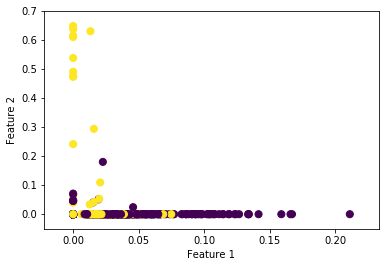

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.95,ngram_range=(1,2),
                                   binary=False, decode_error='ignore',stop_words='english')
#data = load_files(movie_reviews_data_folder, shuffle=False)
X_all, X_test, y_all, y_test = train_test_split(dataset.data, dataset.target, test_size=0, random_state=None)
tfidf_Xall = tfidf_vectorizer.fit_transform(X_all)
tfidf_Xall = tfidf_Xall.toarray()

feature_new = SelectKBest(chi2, k=2).fit_transform(tfidf_Xall, y_all)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
f_new = feature_new
scatter = ax.scatter(f_new[:,0],f_new[:,1],c=y_all,s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **